## <a name="table">Table of Contents</a> 

1. [Functions](#functions)

2. [General Statistics](#general)  

    2.1 [Prepare Data](#gs-data)  
        
    2.2 [Users in the Group](#users)
    
    2.3 [Messages over time](#gs-messages)  
    
    2.4 [Active Moments](#gs-active) 
    
    2.5 [Averages / Summaries](#gs-averages) 
    
    2.6 [Response Time](#gs-response) 
    
3. [TF-IDF](#tfidf)  

    3.1 [Count Vector](#tf-count)  

    3.2 [Unique Words](#tf-unique)  

    3.3 [Plot Image](#tf-image)  

4. [Emoji Analysis](#emoji)  

    4.1 [Prepare Data](#emoji-prepare)  

    4.2 [Unique and Common Emojis](#emoji-stats)  

    4.3 [Correlation Matrix](#emoji-corr)  
    
5. [Topic Modelling](#topic)  

    5.1 [Prepare Data](#topic-prepare)  

    5.2 [LDA](#topic-lda)  

    5.3 [NMF](#topic-nmf)  
    
6. [Sentiment Analysis](#sentiment)  

    6.1 [Prepare Data](#sentiment-prepare)  

    6.2 [Average Sentiment](#sentiment-average)  
    
    6.3 [Plot Sentiment](#sentiment-plot)  
    
7. [Word Clouds](#cloud)  

    7.1 [Prepare Data](#cloud-prepare)  

    7.2 [Masked Word Cloud](#cloud-mask)  

    7.3 [Sentiment-based Word Cloud](#cloud-sentiment) 


## <a name="functions">1. Functions</a> 
[Back to Table of Contents](#table)

In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Whatlyse')  # Needed to import package in parent dir, remove this if you pip installed the package
from dallas.whatsapp import helper      # Helper to prepare the data
from dallas.whatsapp import general     # General statistics
from dallas.whatsapp import tf_idf      # To calculate TF-IDF
from dallas.whatsapp import emoji       # To analyze emoji use
from dallas.whatsapp import topic       # Topic modelling and summarization
from dallas.whatsapp import sentiment   # Sentiment Analysis
from dallas.whatsapp import wordcloud   # Create Word Clouds

from dallas.colors   import colors      # Frequent Color Visualization

%matplotlib inline

%load_ext autoreload
%autoreload 2

## <a name="general">2. General Statistics</a> 
[Back to Table of Contents](#table)

#### <a name="gs-data">2.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data is preprocessed by loading in the raw txt file which is sent through whatsapp to your mail. The following columns are created:
* Message_Raw
    * The raw message for each user (including date and name of user)
* User
    * The user who has sent the message, if no users have sent that message
    then it is simply removed from the dataframe
* Message_Clean
    * Only containing the message, but with all possible symbols in there
    Thus, no date and no name of the user
* Message_Only_Text
    * Only text, lowercase
* Date
    * Date in the format y/m/d

In [ ]:
df = helper.import_data('/content/drive/MyDrive/Whatlyse/WhatsApp Chat .txt')
df = helper.preprocess_data(df)

# Change labels for anonymization - Leave this at False
if False:
    user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['Person 1', 'Person 2'])}
    df.User = df.User.map(user_labels)

#### <a name="users">2.2 Users in the group</a> 
[Back to Table of Contents](#table)

In [ ]:
general.print_users(df)

#############
##  Users  ##
#############

Person 1
Person 2


In [ ]:
user1 = "Person 1"
language = "english"

#### <a name="gs-messages">2.3 Messages over time</a> 
[Back to Table of Contents](#table)

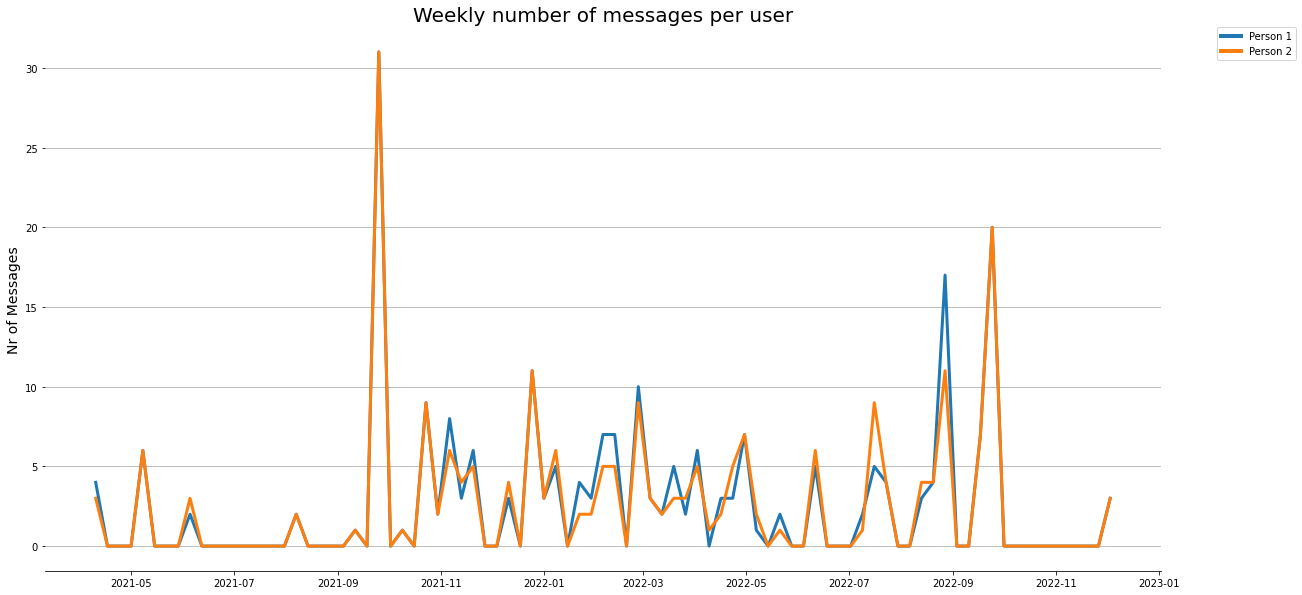

In [ ]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

#### <a name="gs-active">2.4 Active Moments</a> 
[Back to Table of Contents](#table)

**Daily Activity**  
This shows the daily activity per person in a spider plot and in total in a histogram. 
NOTE: This is unstandardized data, which means that it also shows the amount of messages. 

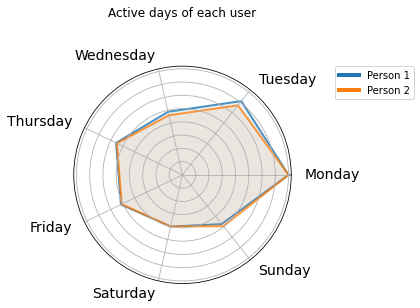

In [ ]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

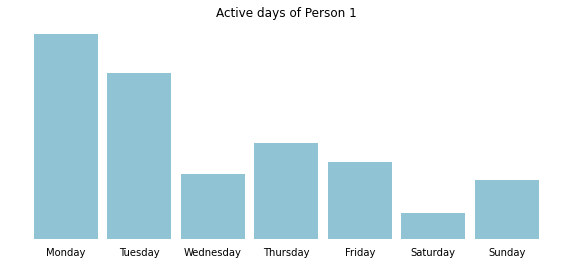

In [ ]:
general.plot_active_days(df, savefig=False, dpi=100, user=user1)

**Hourly Activity**  
It shows which days are most active based on the period in which most messages are send. 

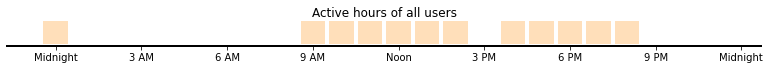

In [ ]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

**Calendar Map**  
Here you can choose for which year you want to see the activity

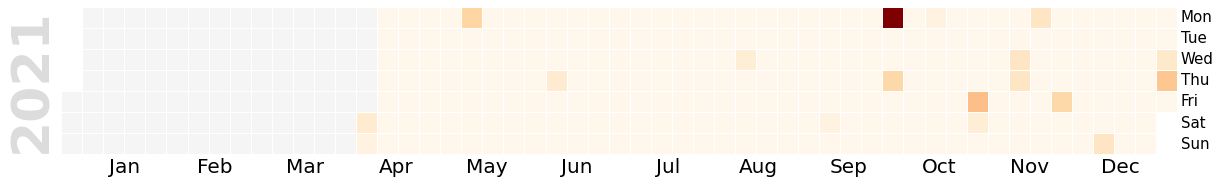

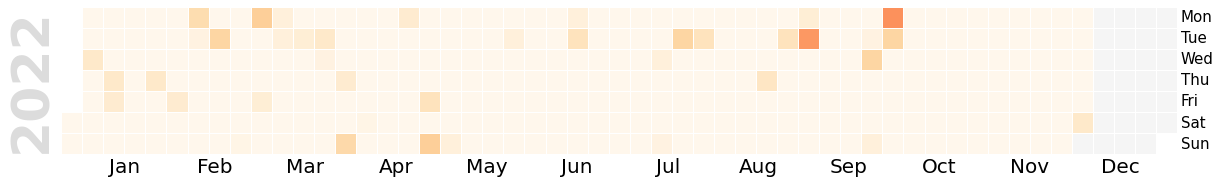

In [ ]:
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')

#### <a name="gs-averages">2.5 Averages / Summaries</a> 
[Back to Table of Contents](#table)

In [ ]:
general.print_stats(df)

##########################
##  Number of Messages  ##
##########################

232	Person 1
223	Person 2

#######################
##  Number of Words  ##
#######################

2538	Person 1
2372	Person 2

#########################
##  Messages per hour  ##
#########################

Person 1:	0.016053141433711598
Person 2:	0.01543039025740382

################################
##  Avg nr Words per Message  ##
################################

Person 1: 10.94
Person 2: 10.64

#############################
##  Avg length of Message  ##
#############################

Person 1: 53.8
Person 2: 52.08

##############################
##  Highscore Day per User  ##
##############################

Person 1
Messages: 	25
Day: 		2021-09-27

Person 2
Messages: 	26
Day: 		2021-09-27



#### <a name="gs-response">2.6 Response Time</a> 
[Back to Table of Contents](#table)

In [ ]:
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

Person 2:                     18.98
Person 1:                     28.21

##############################
##  Nr. Initiated Messages  ##
##############################

Person 1:                     14		(6.03% of all messages)
Person 2:                     12		(5.38% of all messages)


## <a name="tfidf">3. TF-IDF</a> 
[Back to Table of Contents](#table)

#### <a name="tf-count">3.1 Create Count Vector</a> 
[Back to Table of Contents](#table)

It creates the dataframe "counts" which is a dataframe that contains each word that is said in all conversations and counts how often each user has said that word. 

In [ ]:
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language=language, column="Word")

#### <a name="tf-unique">3.2 Unique Words</a> 
[Back to Table of Contents](#table)

In [ ]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

#### <a name="tf-image">3.3 Plot Image</a> 
[Back to Table of Contents](#table)

In [ ]:
tf_idf.print_users(df)

#############
##  Users  ##
#############

Person 1
Person 2


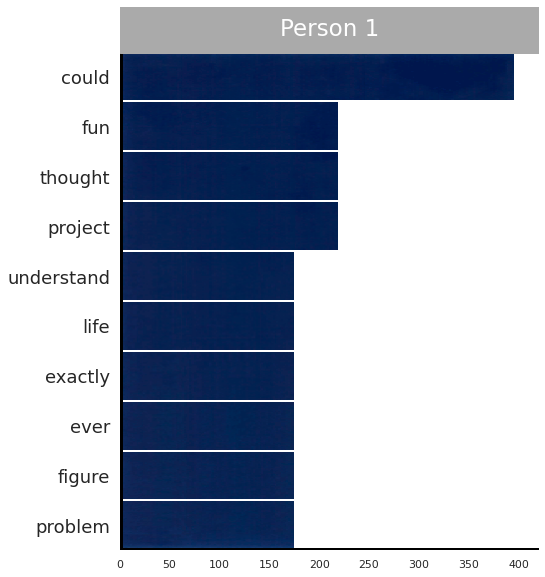

In [ ]:
tf_idf.plot_unique_words(unique_words, 
                         user=user1, 
                         image_path='/content/drive/MyDrive/Whatlyse/images/mask.png', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title=user1, 
                         title_color="white", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

## <a name="emoji">4. Emoji Analysis</a> 
[Back to Table of Contents](#table)

These analysis are based on the Emojis used in each message. Below you can find the following:
* Unique Emoji per user
* Commonly used Emoji per user


#### <a name="emoji-prepare">4.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data needs to be prepared as follows:
* Three new columns are created:
    * *Emoji* contains all emojis in a message
    * *Emoji_Counts* counts the number of emojis in a message
    * *Different_Emojis* extracts them in a list for handling purposes
* *counts* is a dictionary of dictionaries containing the count of each emoji per user
* *unique_emoji* is a dict of dicts containing a uniqueness score of each emoji per user compared to other users

In [ ]:
pip install emoji==0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://github.com/pandas-dev/pandas/issues/17892
temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

#### <a name="emoji-stats">4.2 Unique and Common Emoji</a> 
[Back to Table of Contents](#table)



In [ ]:
emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################

Person 1
🤗 3.84549356223176
🤩 2.884120171673819
😩 2.884120171673819

Person 2
😎 3.1205357142857144
😞 2.0803571428571437
💪 2.0803571428571423

#########################
### Most Common Emoji ###
#########################

Person 1
❤ 10
😊 9
😔 7

Person 2
😊 17
❤ 8
😍 7



/content/drive/MyDrive/Whatlyse/dallas/whatsapp/emoji.py:263: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  plt.tight_layout()
/content/drive/MyDrive/Whatlyse/dallas/whatsapp/emoji.py:263: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


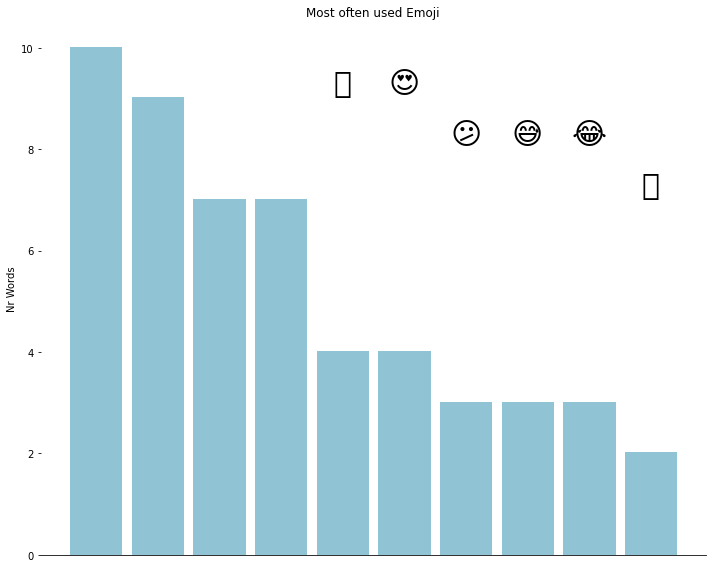

In [ ]:
emoji.plot_counts(counts, user = user1)

#### <a name="emoji-corr">4.3 Correlation Matrix</a> 
[Back to Table of Contents](#table)

Below you find a correlation matrix of the 15 most often used emoji by a single user. The reasoning for only taking 15 emojis is that otherwise the matrix simply becomes too big. 

In [ ]:
emoji.plot_corr_matrix(df, user1, list_of_words, counts)

## <a name="topic">5. Topic Modelling</a> 
[Back to Table of Contents](#table)

#### <a name="topic-prepare">5.1 Prepare Data</a> 
[Back to Table of Contents](#table)


#### <a name="topic-lda">5.2 LDA </a> 
[Back to Table of Contents](#table)


In [ ]:
topic.topics(df, model='lda', language="english")

################
### Person 1 ###
################



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topics in lda model:
Topic #0: hey new love going im hows hear
Topic #1: thats fun us well going like ill
Topic #2: need im know let anything hear yes
Topic #3: definitely yeah get tough know well think
Topic #4: im really youre sure lot like feel

################
### Person 2 ###
################


Topics in lda model:
Topic #0: thanks im absolutely know us good things
Topic #1: like call voice missed hear yeah going
Topic #2: im great definitely yeah forward really need
Topic #3: thats yeah true see think ill good
Topic #4: great yeah like thanks get sounds hope



#### <a name="topic-nmf">5.3 NMF </a> 
[Back to Table of Contents](#table)


In [ ]:
topic.topics(df, model='nmf', language="english")

################
### Person 1 ###
################


Topics in nmf model:
Topic #0: im sure sorry hear well oh yeah
Topic #1: hey going hows new heard thought ever
Topic #2: definitely yeah best one work challenge hope
Topic #3: really love thanks appreciate well seems support
Topic #4: like feel everything cricket could sounds youre

################
### Person 2 ###
################


Topics in nmf model:
Topic #0: thanks good appreciate encouragement hope im asking
Topic #1: yeah pretty im right youre know think
Topic #2: thats true love game wow friends think
Topic #3: great sounds like idea wow good well
Topic #4: definitely positive something well done lets going



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


## <a name="sentiment">6. Sentiment</a> 
[Back to Table of Contents](#table)

#### <a name="sentiment-prepare">6.1 Prepare Data</a> 
[Back to Table of Contents](#table)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['Sentiment'] = df.apply(lambda row: analyser.polarity_scores(row.Message_Clean)["compound"], 1)

#### <a name="sentiment-average">6.2 Average Sentiment Per User</a> 
[Back to Table of Contents](#table)

Prints the average sentiment per user to get an indication of positivity of that user.

In [ ]:
sentiment.print_sentiment(df)

				#######################
				## Positive Messages ##
				#######################
-----------------------
-- Person 1 Messages --
-----------------------
😍 I can definitely see why people get so passionate about this game. I think I'm going to start practicing more often.

It's a huge project for a big client. It's going to be a lot of work, but it's also a great opportunity for us.

Love is something that should be treasured and valued. ❤️

I'm so excited for the election results! Our candidate is doing great!

Thanks! I really love it. 😍

-----------------------
-- Person 2 Messages --
-----------------------
I will. Thanks again for being such a good friend

Yeah, it was nice to take a break and just relax. 😎

Wow, that's impressive! 

That's great news! Congratulations

Thanks, I will. Take care, and good luck with work


				#######################
				## Negative Messages ##
				#######################
-----------------------
-- Person 1 Messages --
-----------------------
I'm 

In [ ]:
sentiment.print_avg_sentiment(df)

			#######################
			## Average Sentiment ##
			#######################
Person 1:                     		0.342
Person 2:                     		0.428





#### <a name="sentiment-plot">6.3 Plot Sentiment</a> 
[Back to Table of Contents](#table)

Below you can see a plot of how positive the messages are over time. The y-axis works as follows, a happy smiley indicates a score of 1 (max value) meaning a positive message and a sad smiley indicates a score of -1 (min value) meaning a negative message. 

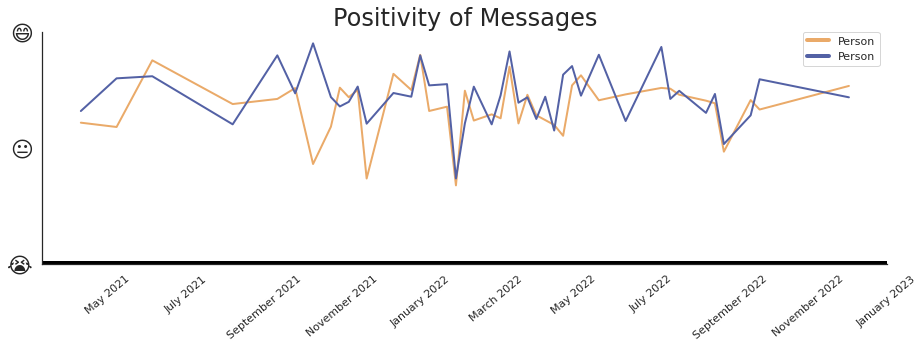

In [ ]:
sentiment.plot_sentiment(df, colors=['#EAAA69','#5361A5'], savefig=False)

## <a name="cloud">7. Word Clouds</a> 
[Back to Table of Contents](#table)

#### <a name="cloud-prepare">7.1 Prepare Data</a> 
[Back to Table of Contents](#table)

In [ ]:
# Counts words and create dictionary of words with counts
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",user_column="User")
counts = tf_idf.remove_stopwords(counts, language="english", column="Word")
words = counts[["Word", user1]].set_index('Word').to_dict()[user1]

#### <a name="cloud-mask">7.2 Masked Word Cloud</a> 
[Back to Table of Contents](#table)

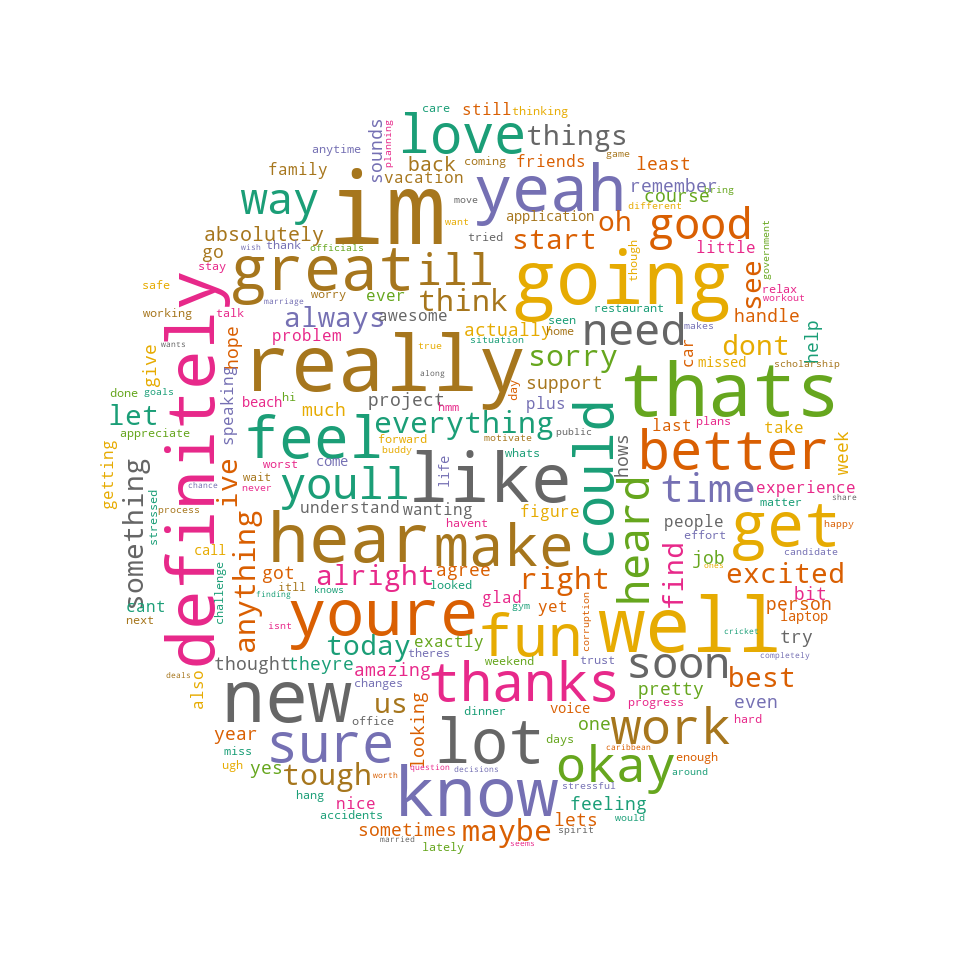

In [ ]:
wordcloud.create_wordcloud(words,random_state=42, mask="/content/drive/MyDrive/Whatlyse/images/download-red-circle-png-31629672921ueeoj9eacg.png",
                           max_words=1000, max_font_size=50, scale=2, 
                           normalize_plurals=False, relative_scaling = 0.5)